In [4]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import random

In [ ]:
style.use('ggplot')

In [1]:
def create_Dataset(n,var,step=2,correlation=False):
  val = 1
  ys = []
  for i in range(n):
    y = val + random.randrange(-var,var)
    ys.append(y)
    if correlation and correlation == 'pos':
      val += step
    elif correlation and correlation == 'neg':
      val -= step
  
  xs = [i for i in range(len(ys))]
  
  return np.array(xs, dtype=np.float64),np.array(ys,dtype=np.float64)

In [5]:
xs, ys = create_Dataset(40,40,2,correlation='pos')

In [6]:
#combining both slope and intercept from our last program in one.
def best_fit_slope_and_intercept(xs,ys): 
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    b = mean(ys) - m*mean(xs)
    return m, b

In [7]:
def squared_error(ys_orig,ys_line):
    return sum((ys_line - ys_orig) * (ys_line - ys_orig))

In [8]:
def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr/squared_error_y_mean)

In [9]:
m, b = best_fit_slope_and_intercept(xs,ys)
regression_line = [(m*x)+b for x in xs]
r_squared = coefficient_of_determination(ys,regression_line)

In [10]:
r_squared#See this time its much better than our last one and that too on a completely random data.With some tuning on thje data we can get even higher results.

0.5637204482810317

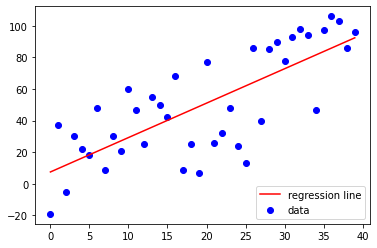

In [13]:
plt.scatter(xs,ys,color='b',label='data')
plt.plot(xs, regression_line, color='r', label='regression line')
plt.legend(loc=4)
plt.show()

In [15]:
xs, ys = create_Dataset(40,10,2,correlation='pos')

In [16]:
m, b = best_fit_slope_and_intercept(xs,ys)
regression_line = [(m*x)+b for x in xs]
r_squared = coefficient_of_determination(ys,regression_line)

In [17]:
r_squared

0.9524716305948915

In [ ]:
#As i said above with just some little fine tuning we have results as great as 95%.